# 交通ルール調整ゲームの進化ゲーム
## 2021KGSOC数理社会学ノート（８章）
石田淳（aishida@kwansei.ac.jp）

佐藤 (2005) に示された交通ルールの調整ゲームを考える．2人のプレイヤーは車に乗る際に，道路の左側を走る（L）か右側を走るかを決める（R）．2人が別々の側を選択すれば，すれ違うときに正面衝突してしまう．ゆえに，2人とも同じ側を選ぶことが双方にとってより良い利得をもたらすが，2人とも右ハンドルの車に乗っているために，右側通行よりも左側通行の方が良いと考えている．このゲームの利得表は以下のようになる．

|   |L  |R  |
|---|---|---|
|L  |2,2|0,0|
|R  |0,0|1,1|

このゲームについて，次のような進化ゲームのシミュレーションを構成しよう．

1. n人のプレイヤーがいる．いずれもLかRかの戦略を持っている．
2. n人のプレイヤー内でランダムにn/2組のペアをつくる（もし，nが奇数であれば，誰か1人が重複してペアに参加し，(n+1)/2組のペアを構成する）．
3. それぞれのペアで調整ゲームを行う．
- 結果が(L,L)であれば，Lプレイヤーが2人増える．
- 結果が(R,R)であれば，Rプレイヤーが1人増える．
- 結果が(L,R)もしくは(R,L)であれば，そのまま
- ただしプレイヤーの総数は増えず，比率が変化する
4. 1に戻る

必要なパッケージを読み込む

In [1]:
import matplotlib.pyplot as plt
import random
import statistics as st

Lを1，Rを0として戦略の組が与えられたときのレプリケータ関数を定義する．

In [2]:
def replicator(x, y): #1: left. 0: right
    if x == 1 and y == 1:
        return [1, 1]
    elif x == 0 and y == 0:
        return [0]
    else:
        return []

Lの初期割合を0.3，プレイヤー（アント）の数を1000として20試行を行う．

In [3]:
# initial values
initial_prop = 0.3
num_ants = 1000
num_L = int(initial_prop * num_ants // 1)
# creating initial ants
ants = [1 for i in range(num_L)]
ants.extend([0 for i in range(num_ants - num_L)])

prop_hist = [st.mean(ants)]

In [4]:
for t in range(30):
    # random shuffling ants
    random.shuffle(ants)
    # if number of ants is odd number, then replicate the last one
    if len(ants) % 2 == 1:
        ants.append(ants[-1])
    # gameing with the ant in the next door
    reps = []
    for i in range(0, len(ants), 2):
        reps.extend(replicator(ants[i], ants[i + 1]))
    ants.extend(reps)
    prop = st.mean(ants)
    prop_hist.append(prop)
    # creating next ants by updated prop
    num_L = int(prop * num_ants // 1)
    ants = [1 for i in range(num_L)]
    ants.extend([0 for i in range(num_ants - num_L)])

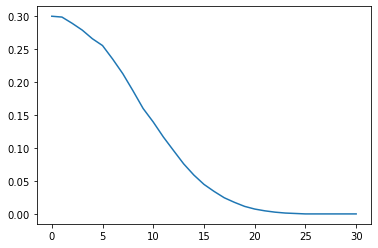

In [5]:
plt.plot(prop_hist)
plt.show();

Lの初期割合を0.1から0.9まで変えて試行を行う．

In [6]:
# initial values
prop_hists = []
for i in range(1, 10, 1):
    initial_prop = i/10
    num_ants = 1000
    num_L = int(initial_prop * num_ants // 1)
    # creating initial ants
    ants = [1 for i in range(num_L)]
    ants.extend([0 for i in range(num_ants - num_L)])

    prop_hist = [st.mean(ants)]

    for t in range(30):
        # random shuffling ants
        random.shuffle(ants)
        # if number of ants is odd number, then replicate the last one
        if len(ants) % 2 == 1:
            ants.append(ants[-1])
        # gameing with the ant in the next door
        reps = []
        for i in range(0, len(ants), 2):
            reps.extend(replicator(ants[i], ants[i + 1]))
        ants.extend(reps)
        prop = st.mean(ants)
        prop_hist.append(prop)
        # creating next ants by updated prop
        num_L = int(prop * num_ants // 1)
        ants = [1 for i in range(num_L)]
        ants.extend([0 for i in range(num_ants - num_L)])
    prop_hists.append(prop_hist)

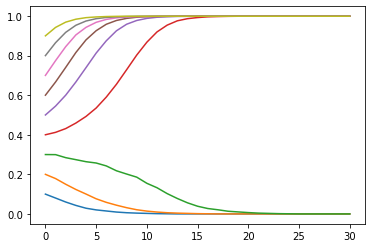

In [7]:
for prop_hist in prop_hists:
    plt.plot(prop_hist)
plt.show();